In [1]:
import torch
from torch.utils.data import DataLoader
from torch.autograd import Variable

from dataloaders.dataset import VideoDataset

In [2]:
train_dataloader = DataLoader(VideoDataset(dataset='kth', split='train',clip_len=16, preprocess = False), batch_size=8, shuffle=True)
    

Number of train videos: 383


In [3]:
batch = next(iter(train_dataloader))

In [4]:
case = batch[0][1]

In [5]:
case = torch.transpose(case, 0,1)

In [6]:
case = torch.transpose(case, 1,3)

In [7]:
case = torch.transpose(case, 2,1)

In [86]:
torch.min(case)

tensor(-74.)

In [8]:
import matplotlib.pyplot as plt

In [9]:
case.shape

torch.Size([16, 112, 112, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

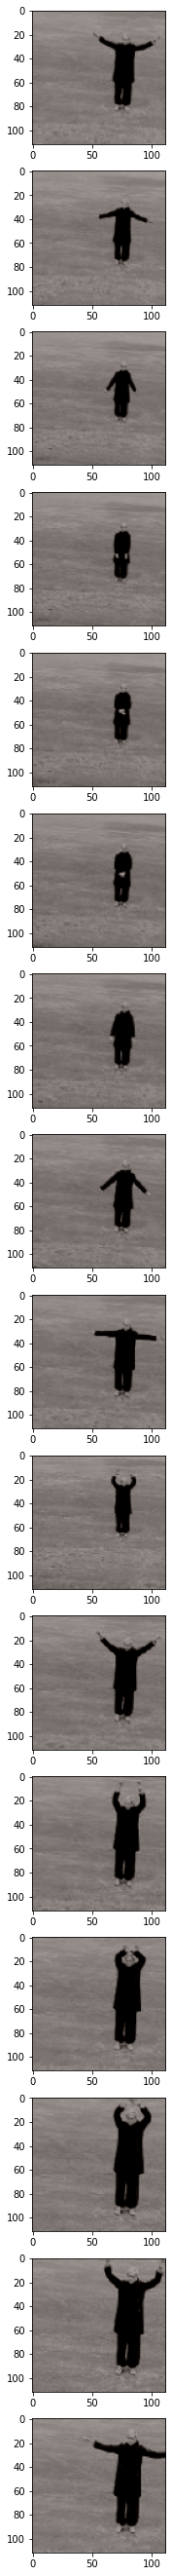

In [10]:
plt.figure()
plt.rcParams["figure.figsize"] = (3,48)
f, axarr = plt.subplots(case.shape[0],1) 
for i in range(case.shape[0]):
    axarr[i].imshow(case[i]/255)

In [11]:
from norse.torch import ConstantCurrentLIFEncoder

In [81]:
case2 = case[1]/25

In [82]:
case2.shape

torch.Size([112, 112, 3])

4
4
4


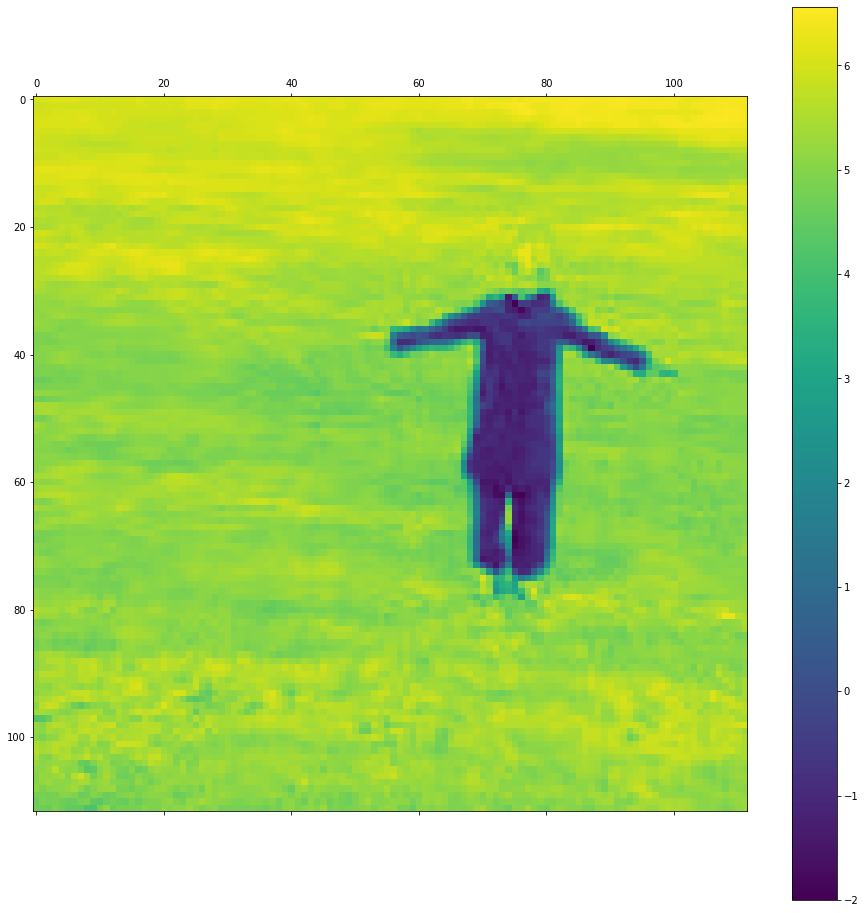

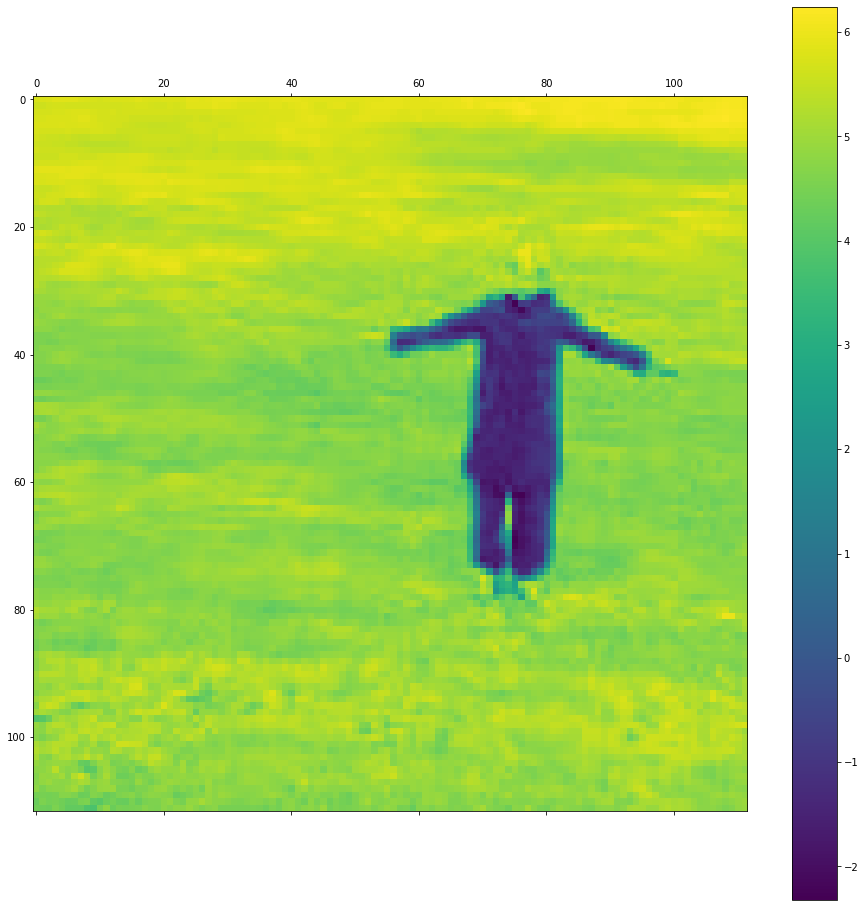

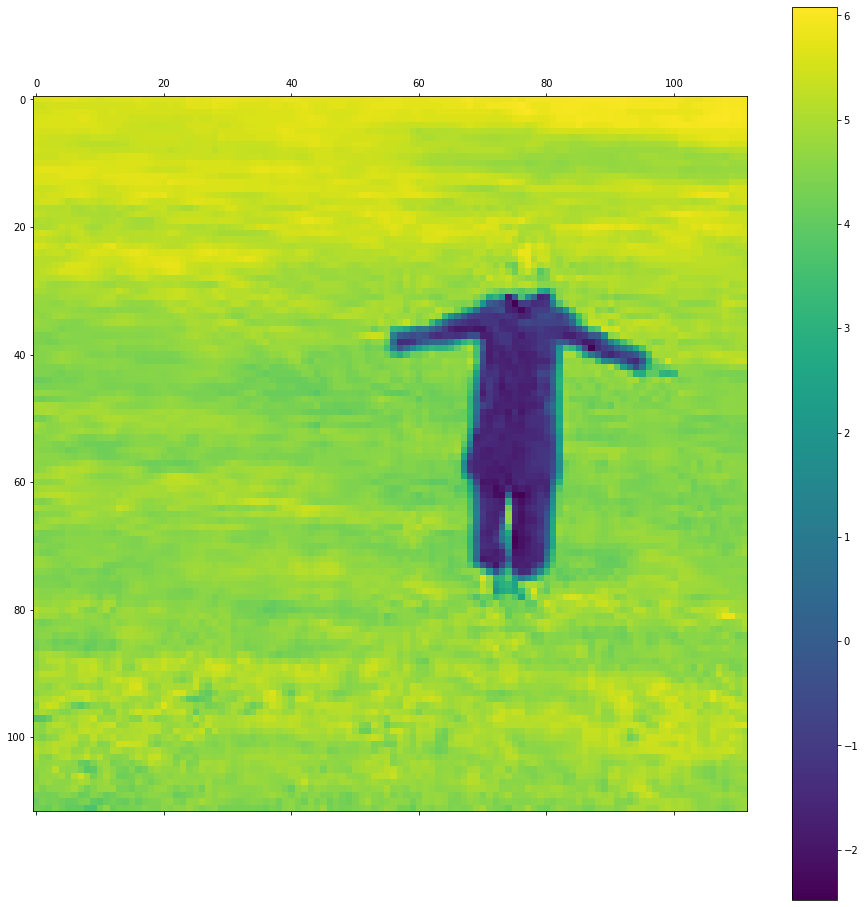

In [83]:
img, label = case2, 4
plt.matshow(img[:,:,0])
plt.colorbar()
print(label)
plt.matshow(img[:,:,1])
plt.colorbar()
print(label)
plt.matshow(img[:,:,2])
plt.colorbar()
print(label)

torch.Size([32, 112, 112])


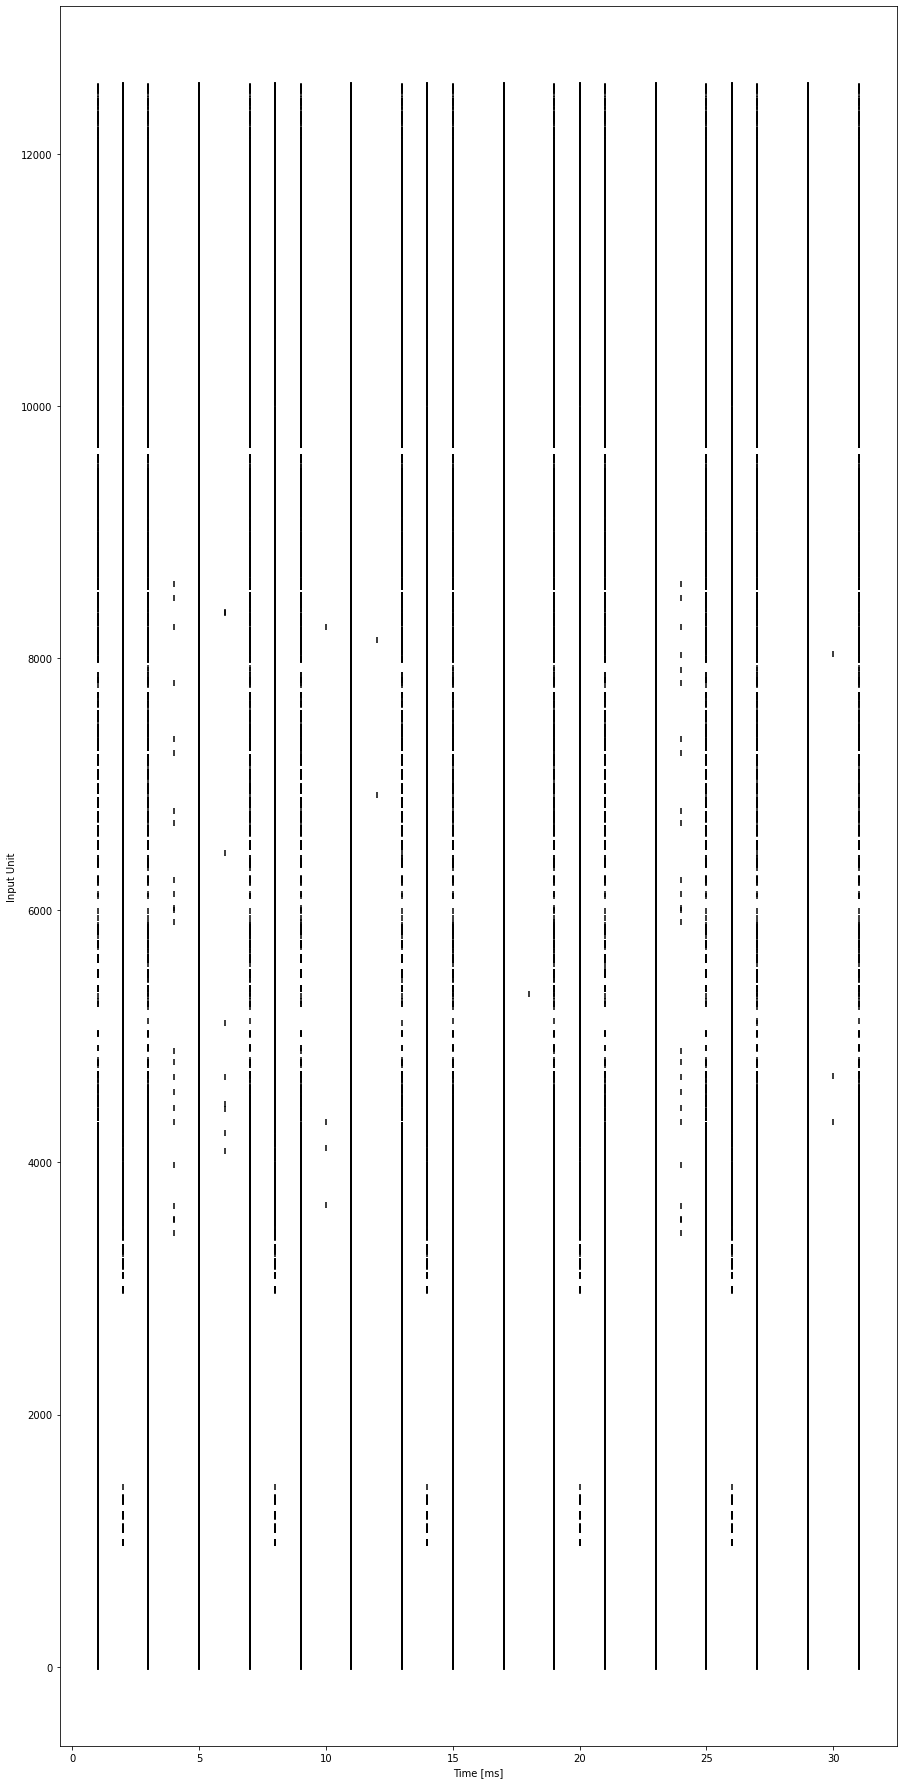

In [91]:
T = 32
example_encoder = ConstantCurrentLIFEncoder(T)


plt.rcParams["figure.figsize"] = (15,32)

example_input = example_encoder(img[:,:,0])
print(example_input.shape)
example_spikes = example_input.reshape(T,112*112).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, marker='|', color='black')
plt.ylabel('Input Unit')
plt.xlabel('Time [ms]')
plt.show()

In [85]:
torch.mean(example_input)

tensor(0.3899)

## ConstantCurrentLIFEncoder Tests

torch.Size([64, 11])


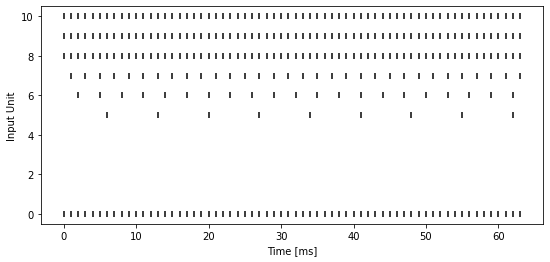

In [105]:
T = 64
example_encoder = ConstantCurrentLIFEncoder(T)

plt.rcParams["figure.figsize"] = (9,4)

data = [16, 0.1, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]

example_input = example_encoder(torch.as_tensor(data))
print(example_input.shape)
example_spikes = example_input.reshape(T,len(data)).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, marker='|', color='black')
plt.ylabel('Input Unit')
plt.xlabel('Time [ms]')
plt.show()

In [1]:
import torch

In [8]:
data = [[[1,1,1],[3,1,1],[1,2,4]],[[2,4,5],[0,0,0],[9,0,0]]]


In [9]:
qq = torch.as_tensor(data)

In [10]:
torch.max(qq, 1)

torch.return_types.max(
values=tensor([[3, 2, 4],
        [9, 4, 5]]),
indices=tensor([[1, 2, 2],
        [2, 0, 0]]))